# **Framework For Analyzing Party Voting Patterns Among Twiter Users Based On Sentiment Prediction Results Using BERT Architecture**

Presented By **Kantima Techaphonprasit** (6410422027)

Independent Study
| 21st July 2023

# Import Necessary Library



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from google.colab import drive
drive.mount("/content/drive")

#Colab Pro

## Faster GPUs

Users who have purchased one of Colab's paid plans have access to premium GPUs. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to enable Premium accelerator. Subject to availability, selecting a premium GPU may grant you access to a V100 or A100 Nvidia GPU.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator dropdown to GPU.

## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape dropdown. After, re-execute the code cell.


In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

#1) Data Collection using SNscrape

https://medium.com/dataseries/how-to-scrape-millions-of-tweets-using-snscrape-195ee3594721

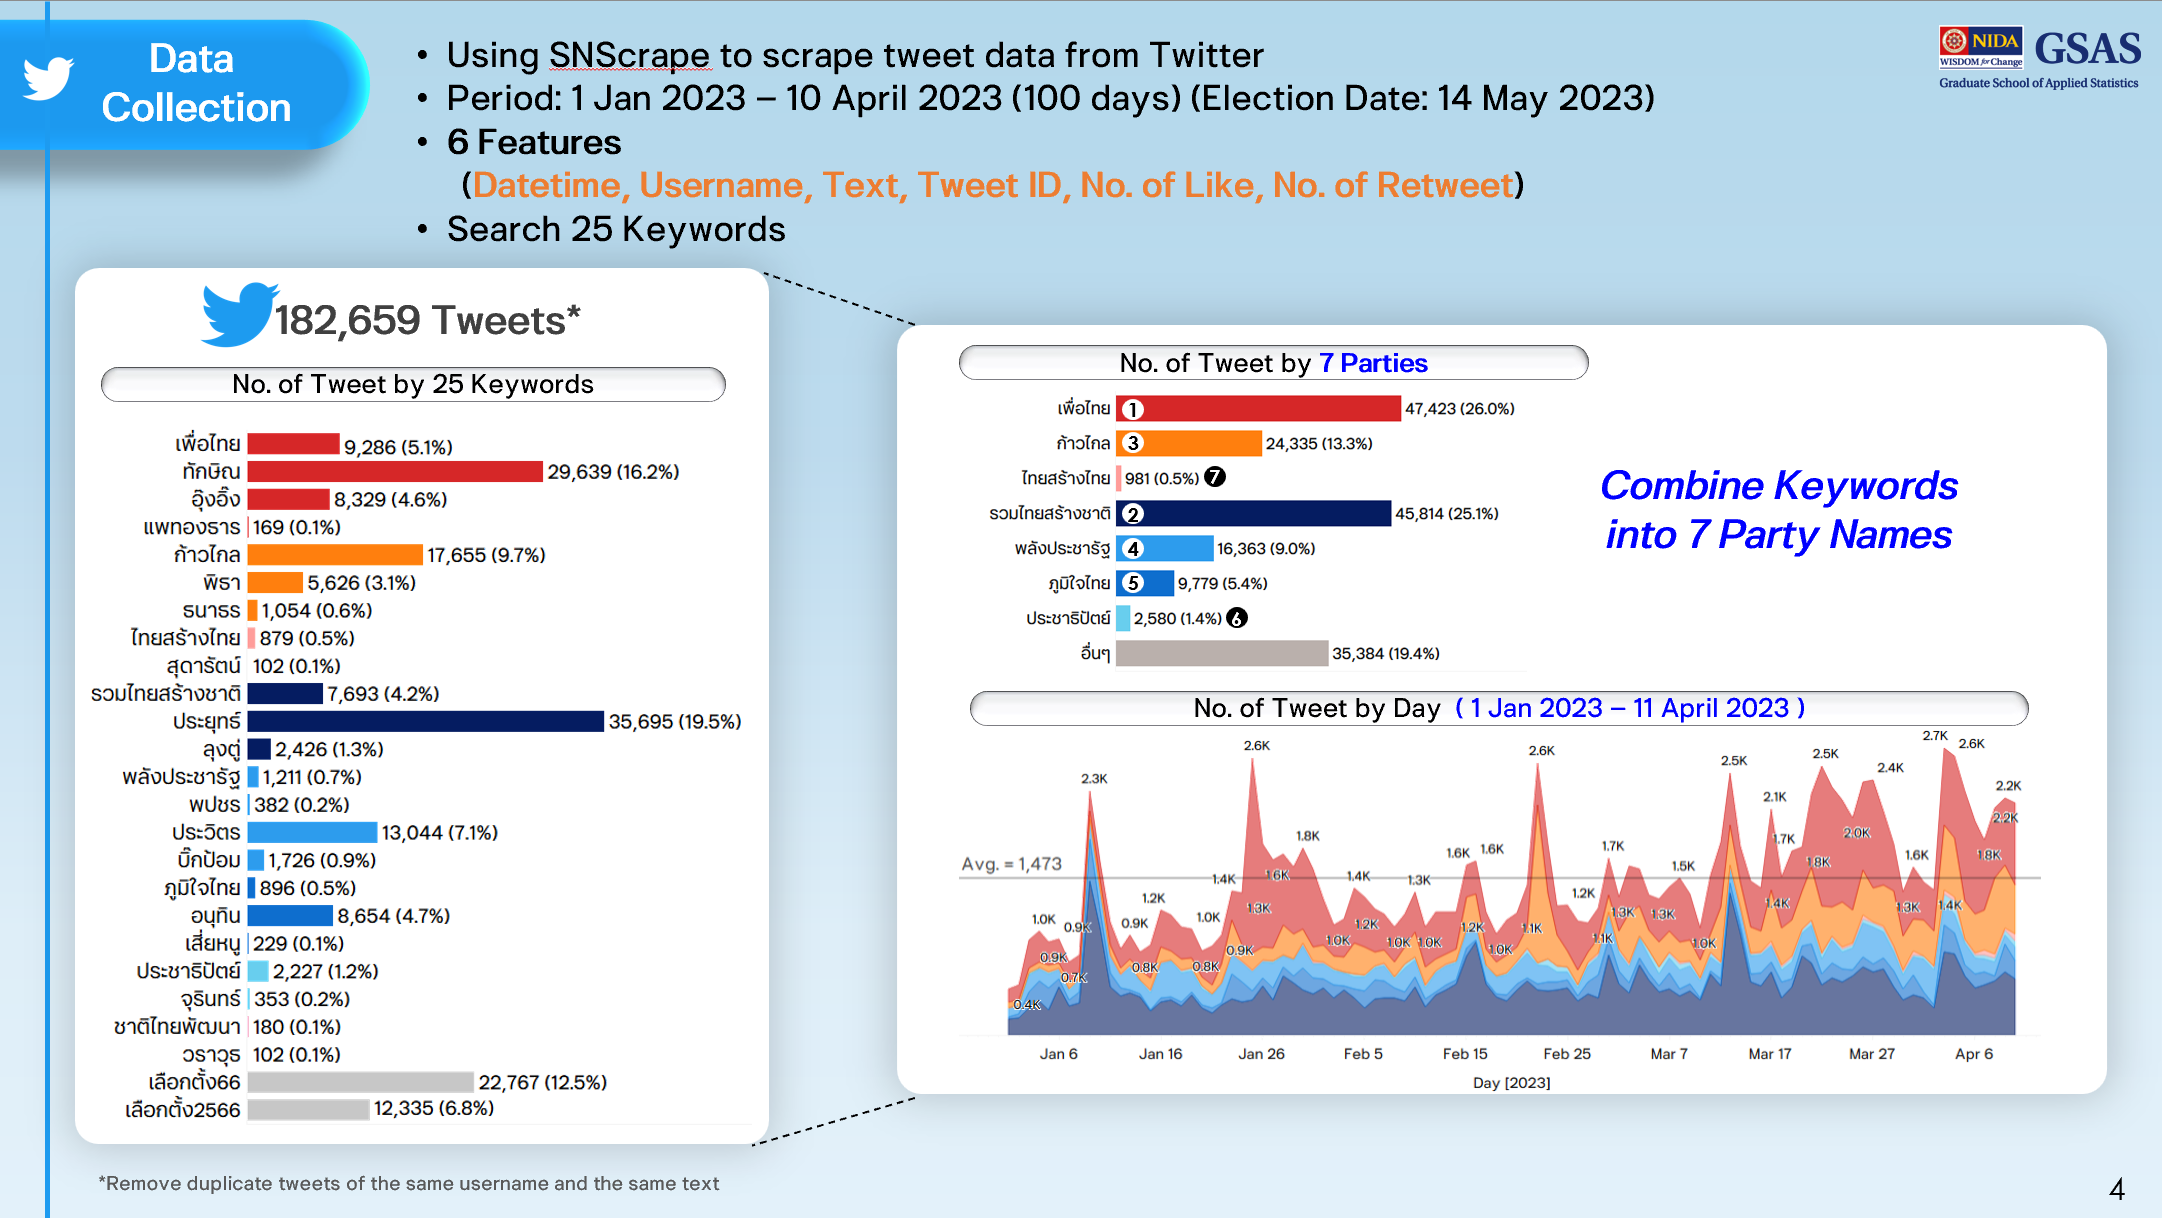

In [ ]:
pip install git+https://github.com/JustAnotherArchivist/snscrape.git

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
Keywords = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ',
'ไทยสร้างไทย','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','จุรินทร์','พิธา','สุดารัตน์','ประยุทธ์','พปชร','ลุงตู่','ธนาธร','ทักษิณ']
#'วราวุธ''เลือกตั้ง66','เลือกตั้ง2566','ชาติไทยพัฒนา',
d = {key: pd.DataFrame() for key in Keywords}

for ind, v in enumerate(Keywords):
  # Creating list to append tweet data to
  tweets_list2 = []

  # Using TwitterSearchScraper to scrape data and append tweets to list
  for i,tweet in enumerate(sntwitter.TwitterSearchScraper(f'{v} since:2023-04-11 until:2023-05-01').get_items()):
      if i>200000:
          break
      tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username, tweet.likeCount, tweet.retweetCount])

  # Creating a dataframe from the tweets list above
  tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username','Like_count','Re_count'])
  # Add column
  tweets_df2['key'] = v
  print(ind,' ',v, ' ', tweets_df2.shape)
  # tweets_df2.to_csv(f'{Keywords[ind]}.csv', encoding="utf-8-sig")
  d[ind] = tweets_df2

print('\a')

df = pd.concat(d)
df.to_csv(f"/content/drive/MyDrive/NLP/Newkeyword_20230411-20230401.csv", encoding="utf-8-sig")
df.shape

# Console Data

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/25keywords_20230101-20230324.csv')
df2 = pd.read_csv('/content/25keyword_20230325-20230410.csv')

In [ ]:
del df2["Unnamed: 0"]
del df2["Unnamed: 1"]
df2

In [ ]:
#Concat dataframes
df = pd.concat([df1,df2])
df.to_csv(f"25keywords_20230101-20230410.csv", encoding="utf-8-sig")
df.shape
df

#EDA

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df['Text'].nunique()

In [ ]:
#Find NA
df.isna().sum()

In [ ]:
#Rename Column
df.columns = df.columns.str.replace('Tweet Id', 'tweet_id')
df.columns

In [ ]:
Keywords = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ',
'ไทยสร้างไทย','ชาติไทยพัฒนา','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','จุรินทร์','พิธา','วราวุธ','สุดารัตน์','ประยุทธ์','พปชร','เลือกตั้ง66','เลือกตั้ง2566','ลุงตู่','ธนาธร','ทักษิณ']
# add column and Flag 0/1
for i in Keywords:
  # df[i] = np.where(df['key'].str.contains(i, case=False, na=False), '1', '0')
    df[i] = np.where(df['Text'].str.contains(i, case=False, na=False), '1', '0')

In [ ]:
df

In [ ]:
#หา duplicate tweet_id
# Get list of duplicate rows based on list of column names and Using sort values
df2 = df[df.tweet_id.duplicated(keep=False)].sort_values("tweet_id")
df2

In [ ]:
df3 = df.groupby('tweet_id').count()
df3.sort_values("Text", ascending=False)

In [ ]:
df4 = df
del df4['key']
df4

In [ ]:
#drop duplicates
df4.drop_duplicates()
df4

In [ ]:
df2

In [ ]:
# for j in cnt:
#   cv1 = pd.read_csv(f'/content/{Keyword}_{j}.csv')
#   cv2 = pd.read_csv(f'/content/{Keyword}_{j}.csv')
#   cv3 = pd.read_csv(f'/content/{Keyword}_{j}.csv')
#   cv4 = pd.read_csv(f'/content/{Keyword}_{j}.csv')
#   cv5 = pd.read_csv(f'/content/{Keyword}_{j}.csv')
#   cv6 = pd.read_csv(f'/content/{Keyword}_{j}.csv')

# #Merge all files
# frames = [cv1, cv2, cv3, cv4, cv5, cv6]
# df1 = pd.concat(frames)
# df1.to_csv(f"{Keyword}_20230101-20230320.csv", encoding="utf-8-sig")
# df1.shape

In [ ]:
# #Concal dataframes
# p1 = pd.concat([df,df1,df2,df3,df4,df5,df6,df7])
# p1.shape

# Combine Keywords into 7 Party Names

##Import file from Google

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/v_1.csv')
del df["Unnamed: 0"]
df

### Combine Keywords into 7 Party Names

In [ ]:
Keywords = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ', 'ไทยสร้างไทย','ชาติไทยพัฒนา','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน', 'เสี่ยหนู','จุรินทร์','พิธา','วราวุธ','สุดารัตน์','ประยุทธ์','พปชร','เลือกตั้ง66','เลือกตั้ง2566','ลุงตู่','ธนาธร','ทักษิณ']

In [ ]:
for i in Keywords:
  print(i,' ',df[(df[i] == 1)].shape[0])

Keywords = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ',
'ไทยสร้างไทย','ชาติไทยพัฒนา','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','จุรินทร์','พิธา','วราวุธ','สุดารัตน์','ประยุทธ์','พปชร','เลือกตั้ง66','เลือกตั้ง2566','ลุงตู่','ธนาธร','ทักษิณ']

In [ ]:
#Combine Keywords into 7 Party Names
df['ก้าวไกล'] = np.where((df.พิธา ==1 ),1,df.ก้าวไกล)
df['ก้าวไกล'] = np.where((df.ธนาธร ==1 ),1,df.ก้าวไกล)
df['เพื่อไทย'] = np.where((df.แพทองธาร ==1 ),1,df.เพื่อไทย)
df['เพื่อไทย'] = np.where((df.อุ๊งอิ๊ง ==1 ),1,df.เพื่อไทย)
df['เพื่อไทย'] = np.where((df.ทักษิณ ==1 ),1,df.เพื่อไทย)
df['พลังประชารัฐ'] = np.where((df.ประวิตร ==1 ),1,df.พลังประชารัฐ)
df['พลังประชารัฐ'] = np.where((df.บิ๊กป้อม ==1 ),1,df.พลังประชารัฐ)
df['พลังประชารัฐ'] = np.where((df.พปชร ==1 ),1,df.พลังประชารัฐ)
df['ภูมิใจไทย'] = np.where((df.อนุทิน ==1 ),1,df.ภูมิใจไทย)
df['ภูมิใจไทย'] = np.where((df.เสี่ยหนู ==1 ),1,df.ภูมิใจไทย)
df['ประชาธิปัตย์'] = np.where((df.จุรินทร์ ==1 ),1,df.ประชาธิปัตย์)
df['รวมไทยสร้างชาติ'] = np.where((df.ประยุทธ์ ==1 ),1,df.รวมไทยสร้างชาติ)
df['รวมไทยสร้างชาติ'] = np.where((df.ลุงตู่ ==1 ),1,df.รวมไทยสร้างชาติ)
df['ไทยสร้างไทย'] = np.where((df.สุดารัตน์ ==1 ),1,df.ไทยสร้างไทย)
df['ชาติไทยพัฒนา'] = np.where((df.วราวุธ ==1 ),1,df.ชาติไทยพัฒนา)

In [ ]:
for i in Keywords:
  print(i,' ',df[(df[i] == 1)].shape[0])

In [ ]:
df.columns

In [ ]:
df[['Datetime', 'tweet_id', 'Text', 'Username', 'Like_count', 'Re_count',
       'key', 'ก้าวไกล', 'เพื่อไทย', 'พลังประชารัฐ', 'ภูมิใจไทย',
        'ประชาธิปัตย์', 'รวมไทยสร้างชาติ', 'ไทยสร้างไทย', 'ชาติไทยพัฒนา','sum_keys',
       'CountCase']]

In [ ]:
# sum specific columns
df['sum_parties'] = df.iloc[:,7:15].sum(axis=1)
df.sort_values("sum_parties", ascending=False)

In [ ]:
df[['Datetime', 'tweet_id', 'Text', 'Username', 'Like_count', 'Re_count',
       'key', 'ก้าวไกล', 'เพื่อไทย', 'พลังประชารัฐ', 'ภูมิใจไทย',
        'ประชาธิปัตย์', 'รวมไทยสร้างชาติ', 'ไทยสร้างไทย', 'ชาติไทยพัฒนา','sum_keys','sum_parties',
       'CountCase']]

In [ ]:
 for i in range(0,9):
   print(i,' = ',df[(df.sum_parties == i)].shape[0])

### Delete Duplicated Rows by username and Text

In [ ]:
#identify duplicate rows in 'customer_id' column
duplicateRows = df[df.duplicated(['Username','Text'])]

#view duplicate rows
duplicateRows

In [ ]:
duplicateRows.groupby(["Username",'Text']).count().sort_values(['CountCase'],ascending=False)

In [ ]:
df.shape

In [ ]:
df = df.drop_duplicates(subset=["Username",'Text'], keep='first')

In [ ]:
#identify duplicate rows in 'customer_id' column
duplicateRows = df[df.duplicated(['Username','Text'])]

#view duplicate rows
duplicateRows

In [ ]:
for i in Keywords:
  print(i,' ',df[(df[i] == 1)].shape[0])

In [ ]:
df.to_csv(f"v_3_no_dup.csv", encoding="utf-8-sig")

In [ ]:
df.groupby("Username").count().sort_values(['CountCase'],ascending=False).head(25)

#Sentiment Model - Wangchanberta


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/random1000_real.xlsb.csv')
# del df["Unnamed: 0"]
print(df.columns)
df

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/NLP/random1000.csv')
del df1["Unnamed: 0"]
print(df1.columns)
df1

In [ ]:
df2 = pd.merge(df,df1[['Datetime','Text_cleaned']],on='Datetime', how='left')
df2

In [ ]:
pip install emoji --upgrade

In [ ]:
!pip install pythainlp
!pip install epitran

In [ ]:
import pandas as pd
import numpy as np
import re
import os
import time
import warnings
import emoji

from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
from pythainlp.util import isthai
from pythainlp.corpus.common import thai_words
from pythainlp.util import Trie

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/random1000.csv')
# del df["Unnamed: 0"]
df

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/NLP/random1000_real.xlsb.csv')

# del df["Unnamed: 0"]
df2

In [ ]:
df1 = pd.merge(df,df2[['Datetime','human_senti']],on='Datetime', how='left')
df1

In [ ]:
del df1["Unnamed: 0"]
df=df1
df

In [ ]:
#----------Custom dict for tokenizer----------------
reserved_words = {'ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ', 'ไทยสร้างไทย','ชาติไทยพัฒนา','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน', 'เสี่ยหนู','จุรินทร์','พิธา','วราวุธ','สุดารัตน์','ประยุทธ์','พปชร','เลือกตั้ง66','เลือกตั้ง2566','ลุงตู่','ธนาธร','ทักษิณ'}
words = reserved_words.union(thai_words())
custom_dictionary_trie = Trie(words)

#Data pre-processing
def word_token(text):
    return word_tokenize(text, custom_dict=custom_dictionary_trie,engine='newmm')  #Engine - Dict base -> can customize words

def remove_username(post):
        global usernames
        for username in usernames:
            post=str(post).replace(username,"")
        return post

# def remove_emoji(text):
#     return ''.join([c for c in str(text) if c not in emoji.UNICODE_EMOJI['en']])

def remove_emoji(text):
    return emoji.replace_emoji(text)



# df["Text_cleaned"]=df["Text"].apply(remove_username) #remove username
df["Text_cleaned"]=df["Text"]
df['Text_cleaned']= df['Text_cleaned'].apply(remove_emoji) #Emoji
df["Text_cleaned"]=df["Text_cleaned"].apply(lambda x: re.sub(r'[^ก-๙]','',str(x))) #remove non-alphabet
df["Text_cleaned"]=df["Text_cleaned"].apply(lambda x: re.sub(r'เเ','แ', str(x))) #spelling_fix

#Tokenize
df['Text_tokenized']=df['Text_cleaned'].apply(word_token)
df_cleaned = df[["Text","Text_cleaned","Text_tokenized"]]
txt_list = df_cleaned.dropna()
# txt_list = df_final['Message_tokenized'].tolist()

In [ ]:
 for i in range(0,9):
   print(i,' = ',df[(df.sum_parties == i)].shape[0])

## BERT

In [ ]:
# Install transformers and thai2transformers
!pip install transformers
!pip install -q emoji pythainlp==2.2.4 sefr_cut tinydb seqeval sentencepiece pydantic jsonlines
!pip install --no-deps thai2transformers==0.1.2

In [ ]:
pip install sentencepiece

In [ ]:
Timothy1337/finetuning-sentiment-all_df

In [ ]:
from tqdm.auto import tqdm
import torch

#transformers
from transformers import (
    CamembertTokenizer,
    AutoTokenizer,
    AutoModel,
    AutoModelForMaskedLM,
    AutoModelForSequenceClassification,
    AutoModelForTokenClassification,
    TrainingArguments,
    Trainer,
    pipeline,
)

#thai2transformers
import thai2transformers
from thai2transformers.preprocess import process_transformers
from thai2transformers.metrics import (
    classification_metrics,
    multilabel_classification_metrics,
)
from thai2transformers.tokenizers import (
    ThaiRobertaTokenizer,
    ThaiWordsNewmmTokenizer,
    ThaiWordsSyllableTokenizer,
    FakeSefrCutTokenizer,
    SEFR_SPLIT_TOKEN
)

In [ ]:
model_names = [
    'wangchanberta-base-att-spm-uncased',
    'xlm-roberta-base',
    'bert-base-multilingual-cased',
    'wangchanberta-base-wiki-newmm',
    'wangchanberta-base-wiki-ssg',
    'wangchanberta-base-wiki-sefr',
    'wangchanberta-base-wiki-spm',
]

tokenizers = {
    'wangchanberta-base-att-spm-uncased': AutoTokenizer,
    'xlm-roberta-base': AutoTokenizer,
    'bert-base-multilingual-cased': AutoTokenizer,
    'wangchanberta-base-wiki-newmm': ThaiWordsNewmmTokenizer,
    'wangchanberta-base-wiki-ssg': ThaiWordsSyllableTokenizer,
    'wangchanberta-base-wiki-sefr': FakeSefrCutTokenizer,
    'wangchanberta-base-wiki-spm': ThaiRobertaTokenizer,
}
public_models = ['xlm-roberta-base', 'bert-base-multilingual-cased']
#@title Choose Pretrained Model
model_name = "wangchanberta-base-wiki-sefr" #@param ["wangchanberta-base-att-spm-uncased", "xlm-roberta-base", "bert-base-multilingual-cased", "wangchanberta-base-wiki-newmm", "wangchanberta-base-wiki-syllable", "wangchanberta-base-wiki-sefr", "wangchanberta-base-wiki-spm"]

#create tokenizer
tokenizer = tokenizers[model_name].from_pretrained(
                f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
                revision='main',
                model_max_length=416,)


In [ ]:
#@title Choose Multi-class Classification Dataset
dataset_name = "wisesight_sentiment" #@param ['wisesight_sentiment','wongnai_reviews']

#pipeline
classify_multiclass = pipeline(task='sentiment-analysis',
         tokenizer=tokenizer,
         model = f'airesearch/{model_name}' if model_name not in public_models else f'{model_name}',
         revision = f'finetuned@{dataset_name}')

In [ ]:
df['Senti_sefr']=df['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df['label_sefr'] = df['Senti_sefr'].apply(lambda x: x[0]['label'])
# df['score_sefr'] = df['Senti_sefr'].apply(lambda x: x[0]['score'])
df

# df.to_csv(f"/content/drive/MyDrive/NLP/df_senti_random_wn.csv", encoding = "utf-8-sig")

In [ ]:
df.to_csv(f"/content/drive/MyDrive/NLP/random1000_3models.csv", encoding = "utf-8-sig")

In [ ]:
from sklearn.metrics import classification_report
labels = ['neu','neg','pos','q']
print(classification_report(df.human_senti, df.label_sefr, target_names=labels))

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df.human_senti, df.label_newmm)

cm_df = pd.DataFrame(cm,
                     index = labels,
                     columns = labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Plotting a Confusion Matrix with Sklearn
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# df.human_senti, df.label
conf_matrix = confusion_matrix(y_true=df.human_senti, y_pred=df.label_sefr)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
vis.plot()
plt.show()

In [ ]:
dfg = df.iloc[1001:5001, :]
dfg

In [ ]:
  df_senti_a = df.iloc[20001:50001, :]
  df_senti_a['Sentiment']=df_senti_a['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
  df_senti_a['label'] = df_senti_a['Sentiment'].apply(lambda x: x[0]['label'])
  df_senti_a['score'] = df_senti_a['Sentiment'].apply(lambda x: x[0]['score'])
  df_senti_a

  df_senti_a.to_csv(f"/content/drive/MyDrive/NLP/df_senti_50000.csv", encoding = "utf-8-sig")

In [ ]:
df_senti = df.iloc[50001:70001, :]
df_senti['Sentiment']=df_senti['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df_senti['label'] = df_senti['Sentiment'].apply(lambda x: x[0]['label'])
df_senti['score'] = df_senti['Sentiment'].apply(lambda x: x[0]['score'])
df_senti

df_senti.to_csv(f"/content/drive/MyDrive/NLP/df_senti_70000.csv", encoding = "utf-8-sig")

In [ ]:
df_senti = df.iloc[70001:100001, :]
df_senti['Sentiment']=df_senti['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df_senti['label'] = df_senti['Sentiment'].apply(lambda x: x[0]['label'])
df_senti['score'] = df_senti['Sentiment'].apply(lambda x: x[0]['score'])
df_senti

df_senti.to_csv(f"/content/drive/MyDrive/NLP/df_senti_100k.csv", encoding = "utf-8-sig")

In [ ]:
df_senti = df.iloc[100001:125001, :]
df_senti['Sentiment']=df_senti['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df_senti['label'] = df_senti['Sentiment'].apply(lambda x: x[0]['label'])
df_senti['score'] = df_senti['Sentiment'].apply(lambda x: x[0]['score'])
df_senti

df_senti.to_csv(f"/content/drive/MyDrive/NLP/df_senti_125k.csv", encoding = "utf-8-sig")

In [ ]:
df_senti = df.iloc[125001:150001, :]
df_senti['Sentiment']=df_senti['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df_senti['label'] = df_senti['Sentiment'].apply(lambda x: x[0]['label'])
df_senti['score'] = df_senti['Sentiment'].apply(lambda x: x[0]['score'])
df_senti

df_senti.to_csv(f"/content/drive/MyDrive/NLP/df_senti_150k.csv", encoding = "utf-8-sig")

In [ ]:
df_senti = df.iloc[150001:182660, :]
df_senti['Sentiment']=df_senti['Text_cleaned'].apply(lambda x: classify_multiclass(str(x[:512])))
df_senti['label'] = df_senti['Sentiment'].apply(lambda x: x[0]['label'])
df_senti['score'] = df_senti['Sentiment'].apply(lambda x: x[0]['score'])
df_senti

df_senti.to_csv(f"/content/drive/MyDrive/NLP/df_senti_182659.csv", encoding = "utf-8-sig")

#Prepare Data to Import into Tableau

In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_1000.csv')
df2 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_5000.csv')
df3 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_20000.csv')
df4 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_50000.csv')
df5 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_70000.csv')
df6 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_100k.csv')
df7 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_125k.csv')
df8 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_150k.csv')
df9 = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_182659.csv')

In [ ]:
#Concat dataframes
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9])
del df["Unnamed: 0"]
df.to_csv(f"/content/drive/MyDrive/NLP/v_4_sentiment.csv", encoding="utf-8-sig")
df.shape
df

In [ ]:
df.drop(['Text_tokenized','เลือกตั้ง66','เลือกตั้ง2566','ชาติไทยพัฒนา','จุรินทร์','วราวุธ','Sentiment','Text_cleaned'], axis='columns', inplace=True)
df

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/NLP/In_scope_102997.csv')

In [ ]:
del df["Unnamed: 0"]

In [ ]:
df.drop(['แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','พิธา','สุดารัตน์','ประยุทธ์','พปชร','ลุงตู่','ธนาธร','ทักษิณ'], axis='columns', inplace=True)
df

In [ ]:
df1 = df.iloc[0:50001, :]
df1

In [ ]:
df2 = df.iloc[50001:103000, :]
df2

In [ ]:
df2.to_csv(f"/content/drive/MyDrive/NLP/In_scope_102997_B.csv", encoding="utf-8-sig")

###18 June 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/v_4_sentiment.csv')
del df["Unnamed: 0"]
print(df.columns)
df

In [ ]:
# dff = df[(df.sum_parties == 1)&(df.label != 'q')]
# dff.drop([ 'Text', 'Username', 'Like_count', 'Re_count',
#        'key', 'ก้าวไกล', 'เพื่อไทย', 'พลังประชารัฐ', 'ภูมิใจไทย',
#        'ประชาธิปัตย์', 'รวมไทยสร้างชาติ', 'ไทยสร้างไทย', 'ชาติไทยพัฒนา',
#        'แพทองธาร', 'อุ๊งอิ๊ง', 'ประวิตร', 'บิ๊กป้อม', 'อนุทิน', 'เสี่ยหนู',
#        'จุรินทร์', 'พิธา', 'วราวุธ', 'สุดารัตน์', 'ประยุทธ์', 'พปชร',
#        'เลือกตั้ง66', 'เลือกตั้ง2566', 'ลุงตู่', 'ธนาธร', 'ทักษิณ', 'sum_keys',
#        'CountCase', 'sum_parties', 'Text_cleaned',
#        'Sentiment', 'label', 'score'], axis='columns', inplace=True)
# print(dff.shape)
# dff.to_csv(f"/content/drive/MyDrive/NLP/v_4_sentiment_token.csv", encoding="utf-8-sig")

In [ ]:
# df.drop(['score','เลือกตั้ง66','เลือกตั้ง2566','ชาติไทยพัฒนา','จุรินทร์','วราวุธ','Sentiment','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
# 'เสี่ยหนู','พิธา','สุดารัตน์','ประยุทธ์','พปชร','ลุงตู่','ธนาธร','ทักษิณ'], axis='columns', inplace=True)
# df

In [ ]:
#เลือกเฉพาะ sum_parties = 1
#จาก 182,659 >> 139,113
df = df[(df.sum_parties == 1)]
df.shape

In [ ]:
df1 = pd.pivot_table(df,values=['CountCase'],index=['label'],aggfunc='sum')
df1['% of Total'] = df1['CountCase']/df1['CountCase'].sum()*100

df1.sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'GnBu')

In [ ]:
#เอา q: question ออก
#จาก 139,113 >>>139096
df = df[(df.label != 'q')]
df.shape[0]

In [ ]:
df1 = pd.pivot_table(df,values=['CountCase'],index=['Username'],aggfunc='sum')
df1['% of Total'] = df1['CountCase']/df1['CountCase'].sum()*100

df1.sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'GnBu')

In [ ]:
import plotly.graph_objects as go
# Calculate the number of tweet IDs for each Username
Username_distribution = df['Username'].value_counts()

# Bin the distribution into bins of size 50
bins = pd.cut(Username_distribution, bins=range(0, max(Username_distribution) + 51, 50))

# Count the number of Usernames in each bin
Username_distribution_binned = bins.value_counts().sort_index()

# Display the Username distribution in bins
print(Username_distribution_binned)


In [ ]:
# Calculate the number of tweet IDs for each Username
Username_distribution = df['Username'].value_counts()

# Bin the distribution into bins of size 50
bins = pd.cut(Username_distribution, bins=range(0, max(Username_distribution) + 51, 50))

# Count the number of Usernames in each bin
Username_distribution_binned = bins.value_counts().sort_index()

# Calculate the accumulated percentage
accumulated_percent = Username_distribution_binned.cumsum() / Username_distribution_binned.sum() * 100

# Create a Plotly histogram
fig = go.Figure()

# Add the bar trace
fig.add_trace(
    go.Bar(
        x=Username_distribution_binned.index.astype(str),
        y=Username_distribution_binned.values,
        text=Username_distribution_binned.values,
        textposition='auto',
        hovertemplate="Number of Tweet IDs: %{y}<br>" +
                       "Accumulated Percent: %{customdata:.2f}%<extra></extra>",
        customdata=accumulated_percent,
        name='Number of Tweet IDs'
    )
)

# Add the line trace on a secondary y-axis
fig.add_trace(
    go.Scatter(
        x=Username_distribution_binned.index.astype(str),
        y=accumulated_percent,
        mode='lines',
        name='Accumulated Percent',
        yaxis='y2'
    )
)

# Set plot and axis titles
fig.update_layout(
    title='Username Distribution by Number of Tweet IDs (Bin Size: 50)',
    xaxis_title='Number of Tweet IDs',
    yaxis=dict(title='Number of Usernames'),
    yaxis2=dict(title='Accumulated Percent', overlaying='y', side='right', showgrid=False, range=[0, 100])
)

# Display the plot
fig.show()

In [ ]:
#เอา Username_counts > 200 ออก
#จาก 139096 >>>103913

# Count the number of tweet IDs for each Username
Username_counts = df['Username'].value_counts()

# Filter Usernames with less than 300 tweet IDs
filtered_Usernames = Username_counts[Username_counts <= 200].index

# Keep only the rows with filtered Usernames
filtered_df = df[df['Username'].isin(filtered_Usernames)]

# Display the filtered DataFrame
print(filtered_df.shape)

In [ ]:
filtered_df

In [ ]:
df = filtered_df
# Assuming your DataFrame is called 'df'
df['party'] = df.apply(lambda row: 'ก้าวไกล' if row['ก้าวไกล'] == 1 or row['พิธา'] == 1 or row['ธนาธร'] == 1
                                 else 'เพื่อไทย' if row['เพื่อไทย'] == 1 or row['แพทองธาร'] == 1 or row['อุ๊งอิ๊ง'] == 1 or row['ทักษิณ'] == 1
                                 else 'พลังประชารัฐ' if row['พลังประชารัฐ'] == 1 or row['ประวิตร'] == 1 or row['บิ๊กป้อม'] == 1 or row['พปชร'] == 1
                                else 'ภูมิใจไทย' if row['ภูมิใจไทย'] == 1 or row['อนุทิน'] == 1 or row['เสี่ยหนู'] == 1
                                else 'ประชาธิปัตย์' if row['ประชาธิปัตย์'] == 1 or row['จุรินทร์'] == 1
                                else 'รวมไทยสร้างชาติ' if row['รวมไทยสร้างชาติ'] == 1 or row['ประยุทธ์'] == 1 or row['ลุงตู่'] == 1
                                else 'ไทยสร้างไทย' if row['ไทยสร้างไทย'] == 1 or row['สุดารัตน์'] == 1
                                       else 0,
                      axis=1)

# Display the updated DataFrame
df

In [ ]:
df1 = pd.pivot_table(df,values=['CountCase'],index=['party'],aggfunc='sum')
df1['% of Total'] = df1['CountCase']/df1['CountCase'].sum()*100

df1.sort_values(by = 'CountCase', ascending = False).head(10).style.background_gradient(cmap = 'GnBu')

In [ ]:
df2 = df
df2.drop([ 'ชาติไทยพัฒนา','แพทองธาร', 'อุ๊งอิ๊ง', 'ประวิตร', 'บิ๊กป้อม', 'อนุทิน', 'เสี่ยหนู',
       'จุรินทร์', 'พิธา', 'วราวุธ', 'สุดารัตน์', 'ประยุทธ์', 'พปชร',
       'เลือกตั้ง66', 'เลือกตั้ง2566', 'ลุงตู่', 'ธนาธร', 'ทักษิณ',
       'Sentiment', 'score'], axis='columns', inplace=True)
df2

In [ ]:
df1 = df2
df1 = df1[df1["party"] != 0]
df1.shape[0]

In [ ]:
df = df1
# Define the fixed proportion of the party column
party_proportions = {"เพื่อไทย": 0.35, "รวมไทยสร้างชาติ": 0.3, "ก้าวไกล": 0.21, "ภูมิใจไทย": 0.06, "พลังประชารัฐ": 0.06, "ประชาธิปัตย์": 0.01, "ไทยสร้างไทย": 0.01}

# Calculate the number of rows to sample for each party
rows_per_party = {party: int(1000 * proportion) for party, proportion in party_proportions.items()}

# Filter the DataFrame by party and sample the specified number of rows
sampled_df = df.groupby("party").apply(lambda x: x.sample(rows_per_party[x.name]))

# Reset the index of the sampled DataFrame
sampled_df = sampled_df.reset_index(drop=True)

# Display the sampled DataFrame
sampled_df

In [ ]:
sampled_df.to_csv(f"/content/drive/MyDrive/NLP/random1000.csv", encoding="utf-8-sig")

In [ ]:
df1.to_csv(f"/content/drive/MyDrive/NLP/In_scope_103820.csv", encoding="utf-8-sig")

#Sentiment Model - Logistic Regression

https://pythainlp.github.io/tutorials/notebooks/sentiment_analysis.html#Text-Processor-for-Logistic-Regression

29 Jun 2023

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/df_senti_random_3models.csv')
del df["Unnamed: 0"]
print(df.columns)
df

In [ ]:
#uncomment if you are running from google colab
!pip install sklearn_crfsuite
!pip install emoji
!pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip
!pip install fastai
!wget https://github.com/PyThaiNLP/wisesight-sentiment/archive/master.zip
!unzip master.zip
!mkdir wisesight_data; ls
!cd wisesight-sentiment-master/kaggle-competition; ls

In [ ]:
#snippet to install thai font in matplotlib from https://gist.github.com/korakot/9d7f5db632351dc92607fdec72a4953f
# !apt install fonts-thai-tlwg
# import matplotlib
# import matplotlib.font_manager
# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
# !cp thsarabunnew-webfont.ttf /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/
# matplotlib.font_manager._rebuild()
# matplotlib.rc('font', family='TH Sarabun New')

!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from pythainlp import word_tokenize
from tqdm import tqdm_notebook
from pythainlp.ulmfit import process_thai

#viz
import matplotlib.pyplot as plt
import seaborn as sns

### Text Processor for Logistic Regression

In [ ]:
?process_thai

In [ ]:
from pythainlp.ulmfit import *
process_thai("บ้านนนนน ()อยู่นานนานนาน 😂🤣😃😄😅 PyThaiNLP amp;     www.google.com")

Process Text Files to CSVs

In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/train.txt") as f:
    texts = [line.strip() for line in f.readlines()]

with open("wisesight-sentiment-master/kaggle-competition/train_label.txt") as f:
    categories = [line.strip() for line in f.readlines()]

all_df = pd.DataFrame({"category":categories, "texts":texts})
all_df.to_csv('all_df.csv',index=False)
all_df.shape

In [ ]:
with open("wisesight-sentiment-master/kaggle-competition/test.txt") as f:
    texts = [line.strip() for line in f.readlines()]

test_df = pd.DataFrame({"category":"test", "texts":texts})
test_df.shape

In [ ]:
train_df.shape

In [ ]:
valid_df.shape

In [ ]:
all_df["processed"] = all_df.texts.map(lambda x: "|".join(process_thai(x)))
all_df["wc"] = all_df.processed.map(lambda x: len(x.split("|")))
all_df["uwc"] = all_df.processed.map(lambda x: len(set(x.split("|"))))

test_df["processed"] = test_df.texts.map(lambda x: "|".join(process_thai(x)))
test_df["wc"] = test_df.processed.map(lambda x: len(x.split("|")))
test_df["uwc"] = test_df.processed.map(lambda x: len(set(x.split("|"))))

In [ ]:
df["processed"] = df.Text_cleaned.map(lambda x: "|".join(process_thai(x)))
df["wc"] = df.processed.map(lambda x: len(x.split("|")))
df["uwc"] = df.processed.map(lambda x: len(set(x.split("|"))))

In [ ]:
#prevalence
all_df.category.value_counts() / all_df.shape[0]

In [ ]:
#prevalence
df.human_senti.value_counts() / df.shape[0]

**Train-validation Split**
> We perform 85/15 random train-validation split. We also perform under/oversampling to balance out the classes a little.



In [ ]:
#when finding hyperparameters
from sklearn.model_selection import train_test_split
train_df, valid_df = train_test_split(all_df, test_size=0.15, random_state=1412)
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)

In [ ]:
#prevalence
print(train_df["category"].value_counts() / train_df.shape[0])

In [ ]:
#prevalence
print(valid_df["category"].value_counts() / valid_df.shape[0])

#### Logistic Regression

In [ ]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["category"]

#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["texts"])
text_test = tfidf_fit.transform(test_df["texts"])
text_train.shape, text_valid.shape,text_test.shape

In [ ]:
#dependent variables
y_train = train_df["category"]
y_valid = valid_df["category"]
y_human = df['human_senti']

#text faetures
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(tokenizer=process_thai, ngram_range=(1,2), min_df=20, sublinear_tf=True)
tfidf_fit = tfidf.fit(all_df["texts"])
text_train = tfidf_fit.transform(train_df["texts"])
text_valid = tfidf_fit.transform(valid_df["texts"])
text_test = tfidf_fit.transform(df["Text_cleaned"])
text_train.shape, text_valid.shape

In [ ]:
pip install visualize

In [ ]:
#visualize texts
from visualize import top_feats_all, plot_top_feats
features = tfidf_fit.get_feature_names()
%time ts = top_feats_all(text_train.toarray(), y_train, features)
print(ts[0].shape)
ts[0].head()

In [ ]:
%time plot_top_feats(ts)

In [ ]:
#word count and unique word counts; actually might not be so useful
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(all_df[["wc","uwc"]].astype(float))
print(scaler_fit.mean_, scaler_fit.var_)
num_train = scaler_fit.transform(train_df[["wc","uwc"]].astype(float))
num_valid = scaler_fit.transform(valid_df[["wc","uwc"]].astype(float))
num_test = scaler_fit.transform(test_df[["wc","uwc"]].astype(float))
num_train.shape, num_valid.shape,num_test.shape

In [ ]:
#word count and unique word counts; actually might not be so useful
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_fit = scaler.fit(df[["wc","uwc"]].astype(float))
print(scaler_fit.mean_, scaler_fit.var_)
num_train = scaler_fit.transform(train_df[["wc","uwc"]].astype(float))
num_valid = scaler_fit.transform(valid_df[["wc","uwc"]].astype(float))
num_test = scaler_fit.transform(df[["wc","uwc"]].astype(float))
num_train.shape, num_valid.shape

In [ ]:
#concatenate text and word count features
X_train = np.concatenate([num_train,text_train.toarray()],axis=1)
X_valid = np.concatenate([num_valid,text_valid.toarray()],axis=1)
X_test = np.concatenate([num_test,text_test.toarray()],axis=1)
X_train.shape, X_valid.shape

In [ ]:
#Fit Model
#fit logistic regression models
model = LogisticRegression(C=2., penalty="l2", solver="liblinear", dual=False, multi_class="ovr")
model.fit(X_train,y_train)
model.score(X_valid,y_valid)

In [ ]:
#Fit Model
#fit logistic regression models
model = LogisticRegression(C=2., penalty="l2", solver="liblinear", dual=False, multi_class="ovr")
model.fit(X_train,y_train)
model.score(X_test,y_human)

In [ ]:
probs = model.predict_proba(X_valid)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df["preds"] = model.predict(X_valid)
probs_df["category"] = valid_df.category
probs_df["texts"] = valid_df.texts
probs_df["processed"] = valid_df.processed
probs_df["wc"] = valid_df.wc
probs_df["uwc"] = valid_df.uwc
probs_df["hit"] = (probs_df.preds==probs_df.category)
probs_df.to_csv("probs_df_linear.csv", index=False)

In [ ]:
probs = model.predict_proba(X_test)
probs_df = pd.DataFrame(probs)
probs_df.columns = model.classes_
probs_df["preds"] = model.predict(X_test)
probs_df["human_senti"] = df.human_senti
probs_df["Text_cleaned"] = df.Text_cleaned
probs_df["processed"] = df.processed
probs_df["wc"] = df.wc
probs_df["uwc"] = df.uwc
probs_df["hit"] = (probs_df.preds==probs_df.human_senti)
probs_df.to_csv("probs_df_linear.csv", index=False)

In [ ]:
probs_df

In [ ]:
probs_df.to_csv(f"/content/drive/MyDrive/NLP/probs_df_linear.csv", encoding="utf-8-sig")

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_df.category,probs_df.preds)
print(model.score(X_valid,y_valid))

sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(probs_df.human_senti,probs_df.preds)
print(model.score(X_test,y_human))

sns.heatmap(conf_mat, annot=True, fmt="d",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
probs_df

In [ ]:
from sklearn.metrics import classification_report
labels = ['neu','neg','pos','q']
print(classification_report(probs_df.category,probs_df.preds, target_names=labels))

In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(probs_df.human_senti, probs_df.preds)

cm_df = pd.DataFrame(cm,
                     index = labels,
                     columns = labels)

plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
# Plotting a Confusion Matrix with Sklearn
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# df.human_senti, df.label
conf_matrix = confusion_matrix(y_true=probs_df.human_senti, y_pred=probs_df.preds)
vis = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
vis.plot()
plt.show()

In [ ]:
cm_df

In [ ]:
#Import the necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#compute the confusion matrix.
cm = confusion_matrix(probs_df.human_senti, probs_df.preds)

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

# Party Scoring by User

29 Jun 2023

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/NLP/In_scope_103820.csv')
del df["Unnamed: 0"]
print(df.columns)
df

In [ ]:
df = df[~df['Text_cleaned'].str.contains('work', case=False)]

In [ ]:
#Remove unrelated tweets
Unrelated = 'ช้อปเลย|โปรดีๆ|ส่วนลด|งานออนไลน์|พร้อมส่ง|ป้ายยา|ช้อป|รับหิ้ว|รวมส่ง|โค้ดลด|แถมฟรี|ลดราคาเหลือ|สนใจทัก|ไม่มีขั้นต่ำ|ส่งฟรี|พร้อมโอน|ปล่อยกู้รายเดือน|ราคาชิ้นละ|ส่งต่อเสื้อผ้า|เสื้อเปิดไหล่|ดีลเดือด|ราคาถูก|ดูดวง|พร้อมส่ง|Spotify|ถอนได้ไม่อั้น|ซื้อตู้เย็น|เสื้อกล้าม|มีงานมาแนะนำ|เกมมือถือ|เสื้อสงกราน|แอนจักรพงษ์|เที่ยวงาน|สอบถามจองคิว|ยำขนมจีน|ครีมบำรุงหน้า|มอทักษิณ,|Google Search Trend|นศ.ทักษิณ|รับสมัครงาน'
df1 = df[df['Text_cleaned'].str.contains(Unrelated, case=False)]
df1

In [ ]:
df = df[~df['Text_cleaned'].str.contains(Unrelated, case=False, regex=True)]

# Resetting the index after deleting rows
df.reset_index(drop=True, inplace=True)

In [ ]:
df.to_csv(f"/content/drive/MyDrive/NLP/In_scope_102997.csv", encoding="utf-8-sig")

## user_table

In [ ]:
user_table = df.groupby('Username').agg({
    'tweet_id': 'count',
    'Like_count': 'sum',
    'Re_count': 'sum',
    'CountCase': 'sum',
    'ก้าวไกล': 'sum',
    'เพื่อไทย': 'sum',
    'พลังประชารัฐ': 'sum',
    'ภูมิใจไทย': 'sum',
    'ประชาธิปัตย์': 'sum',
    'รวมไทยสร้างชาติ': 'sum',
    'ไทยสร้างไทย': 'sum',

    # Add other columns you want to include in the 'user_table' table
}).reset_index()


# Renaming the columns in the 'user_table'
user_table.columns = ['Username', 'Total_tweets', 'Total_likes', 'Total_retweets', 'Total_count',
                      'ก้าวไกล', 'เพื่อไทย', 'พลังประชารัฐ', 'ภูมิใจไทย','ประชาธิปัตย์', 'รวมไทยสร้างชาติ', 'ไทยสร้างไทย',]

# 'กก_pos','กก_neg','กก_neu'

# Printing the 'user_table'
user_table.head(10).sort_values(by = 'Total_tweets', ascending = True).style.background_gradient(cmap = 'GnBu')

In [ ]:
# Creating separate DataFrames for 'กก_pos' and 'กก_neg' columns
กก_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['ก้าวไกล'].sum().reset_index()
กก_pos_df.rename(columns = {'ก้าวไกล':'กก_pos'}, inplace = True)

กก_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['ก้าวไกล'].sum().reset_index()
กก_neg_df.rename(columns = {'ก้าวไกล':'กก_neg'}, inplace = True)

กก_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['ก้าวไกล'].sum().reset_index()
กก_neu_df.rename(columns = {'ก้าวไกล':'กก_neu'}, inplace = True)

# Merging 'กก_pos' column with the 'user_table'
user_table = pd.merge(user_table, กก_pos_df, on='Username', how='left')

# Merging 'กก_neg' column with the 'user_table'
user_table = pd.merge(user_table, กก_neg_df, on='Username', how='left')

# Merging 'กก_neg' column with the 'user_table'
user_table = pd.merge(user_table, กก_neu_df, on='Username', how='left')


In [ ]:
# Creating separate DataFrames for 'พท_pos' and 'พท_neg' columns
พท_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['เพื่อไทย'].sum().reset_index()
พท_pos_df.rename(columns = {'เพื่อไทย':'พท_pos'}, inplace = True)

พท_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['เพื่อไทย'].sum().reset_index()
พท_neg_df.rename(columns = {'เพื่อไทย':'พท_neg'}, inplace = True)

พท_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['เพื่อไทย'].sum().reset_index()
พท_neu_df.rename(columns = {'เพื่อไทย':'พท_neu'}, inplace = True)

# Merging 'พท_pos' column with the 'user_table'
user_table = pd.merge(user_table, พท_pos_df, on='Username', how='left')

# Merging 'พท_neg' column with the 'user_table'
user_table = pd.merge(user_table, พท_neg_df, on='Username', how='left')

# Merging 'พท_neg' column with the 'user_table'
user_table = pd.merge(user_table, พท_neu_df, on='Username', how='left')

In [ ]:
# Creating separate DataFrames for 'พปชร_pos' and 'พปชร_neg' columns
พปชร_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['พลังประชารัฐ'].sum().reset_index()
พปชร_pos_df.rename(columns = {'พลังประชารัฐ':'พปชร_pos'}, inplace = True)

พปชร_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['พลังประชารัฐ'].sum().reset_index()
พปชร_neg_df.rename(columns = {'พลังประชารัฐ':'พปชร_neg'}, inplace = True)

พปชร_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['พลังประชารัฐ'].sum().reset_index()
พปชร_neu_df.rename(columns = {'พลังประชารัฐ':'พปชร_neu'}, inplace = True)

# Merging 'พปชร_pos' column with the 'user_table'
user_table = pd.merge(user_table, พปชร_pos_df, on='Username', how='left')

# Merging 'พปชร_neg' column with the 'user_table'
user_table = pd.merge(user_table, พปชร_neg_df, on='Username', how='left')

# Merging 'พปชร_neg' column with the 'user_table'
user_table = pd.merge(user_table, พปชร_neu_df, on='Username', how='left')

In [ ]:
# Creating separate DataFrames for 'ภจท_pos' and 'ภจท_neg' columns
ภจท_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['ภูมิใจไทย'].sum().reset_index()
ภจท_pos_df.rename(columns = {'ภูมิใจไทย':'ภจท_pos'}, inplace = True)

ภจท_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['ภูมิใจไทย'].sum().reset_index()
ภจท_neg_df.rename(columns = {'ภูมิใจไทย':'ภจท_neg'}, inplace = True)

ภจท_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['ภูมิใจไทย'].sum().reset_index()
ภจท_neu_df.rename(columns = {'ภูมิใจไทย':'ภจท_neu'}, inplace = True)

# Merging 'ภจท_pos' column with the 'user_table'
user_table = pd.merge(user_table, ภจท_pos_df, on='Username', how='left')

# Merging 'ภจท_neg' column with the 'user_table'
user_table = pd.merge(user_table, ภจท_neg_df, on='Username', how='left')

# Merging 'ภจท_neg' column with the 'user_table'
user_table = pd.merge(user_table, ภจท_neu_df, on='Username', how='left')

In [ ]:
# Creating separate DataFrames for 'ปชป_pos' and 'ปชป_neg' columns
ปชป_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['ประชาธิปัตย์'].sum().reset_index()
ปชป_pos_df.rename(columns = {'ประชาธิปัตย์':'ปชป_pos'}, inplace = True)

ปชป_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['ประชาธิปัตย์'].sum().reset_index()
ปชป_neg_df.rename(columns = {'ประชาธิปัตย์':'ปชป_neg'}, inplace = True)

ปชป_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['ประชาธิปัตย์'].sum().reset_index()
ปชป_neu_df.rename(columns = {'ประชาธิปัตย์':'ปชป_neu'}, inplace = True)

# Merging 'ปชป_pos' column with the 'user_table'
user_table = pd.merge(user_table, ปชป_pos_df, on='Username', how='left')

# Merging 'ปชป_neg' column with the 'user_table'
user_table = pd.merge(user_table, ปชป_neg_df, on='Username', how='left')

# Merging 'ปชป_neg' column with the 'user_table'
user_table = pd.merge(user_table, ปชป_neu_df, on='Username', how='left')

In [ ]:
# Creating separate DataFrames for 'รทสช_pos' and 'รทสช_neg' columns
รทสช_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['รวมไทยสร้างชาติ'].sum().reset_index()
รทสช_pos_df.rename(columns = {'รวมไทยสร้างชาติ':'รทสช_pos'}, inplace = True)

รทสช_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['รวมไทยสร้างชาติ'].sum().reset_index()
รทสช_neg_df.rename(columns = {'รวมไทยสร้างชาติ':'รทสช_neg'}, inplace = True)

รทสช_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['รวมไทยสร้างชาติ'].sum().reset_index()
รทสช_neu_df.rename(columns = {'รวมไทยสร้างชาติ':'รทสช_neu'}, inplace = True)

# Merging 'รทสช_pos' column with the 'user_table'
user_table = pd.merge(user_table, รทสช_pos_df, on='Username', how='left')

# Merging 'รทสช_neg' column with the 'user_table'
user_table = pd.merge(user_table, รทสช_neg_df, on='Username', how='left')

# Merging 'รทสช_neg' column with the 'user_table'
user_table = pd.merge(user_table, รทสช_neu_df, on='Username', how='left')

In [ ]:
# Creating separate DataFrames for 'ทสท_pos' and 'ทสท_neg' columns
ทสท_pos_df = df.loc[df['label'] == 'pos'].groupby('Username')['ไทยสร้างไทย'].sum().reset_index()
ทสท_pos_df.rename(columns = {'ไทยสร้างไทย':'ทสท_pos'}, inplace = True)

ทสท_neg_df = df.loc[df['label'] == 'neg'].groupby('Username')['ไทยสร้างไทย'].sum().reset_index()
ทสท_neg_df.rename(columns = {'ไทยสร้างไทย':'ทสท_neg'}, inplace = True)

ทสท_neu_df = df.loc[df['label'] == 'neu'].groupby('Username')['ไทยสร้างไทย'].sum().reset_index()
ทสท_neu_df.rename(columns = {'ไทยสร้างไทย':'ทสท_neu'}, inplace = True)

# Merging 'ทสท_pos' column with the 'user_table'
user_table = pd.merge(user_table, ทสท_pos_df, on='Username', how='left')

# Merging 'ทสท_neg' column with the 'user_table'
user_table = pd.merge(user_table, ทสท_neg_df, on='Username', how='left')

# Merging 'ทสท_neg' column with the 'user_table'
user_table = pd.merge(user_table, ทสท_neu_df, on='Username', how='left')

In [ ]:
user_table.head(10).sort_values(by = 'รทสช_pos', ascending = False)

In [ ]:
user_table.to_csv(f"/content/drive/MyDrive/NLP/user_table.csv", encoding="utf-8-sig")

## Score

In [ ]:
print(user_table.columns)
print(user_table.shape)

In [ ]:
user_table.head(15)

In [ ]:
columns_to_fillna = user_table.columns[12:34]

# Replace NaN with 0 in the specified columns
user_table[columns_to_fillna] = user_table[columns_to_fillna].fillna(0)

In [ ]:
user_table[['Username','Total_tweets','เพื่อไทย','พท_pos','พท_neu','พท_neg','score_พท']].sort_values(by = 'Total_tweets', ascending = False).head(15)

In [ ]:
user_table.to_csv(f"/content/drive/MyDrive/NLP/user_table.csv", encoding="utf-8-sig")

In [ ]:
#Parameter
poss = +3
neuu = 1
negg = -2

Score by Party by User

In [ ]:
user_table['score_กก'] = (user_table.กก_pos*poss)+(user_table.กก_neu*neuu)+(user_table.กก_neg*negg)
user_table['score_พท'] = (user_table.พท_pos*poss)+(user_table.พท_neu*neuu)+(user_table.พท_neg*negg)
user_table['score_พปชร'] = (user_table.พปชร_pos*poss)+(user_table.พปชร_neu*neuu)+(user_table.พปชร_neg*negg)
user_table['score_ภจท'] = (user_table.ภจท_pos*poss)+(user_table.ภจท_neu*neuu)+(user_table.ภจท_neg*negg)
user_table['score_ปชป'] = (user_table.ปชป_pos*poss)+(user_table.ปชป_neu*neuu)+(user_table.ปชป_neg*negg)
user_table['score_รทสช'] = (user_table.รทสช_pos*poss)+(user_table.รทสช_neu*neuu)+(user_table.รทสช_neg*negg)
user_table['score_ทสท'] = (user_table.ทสท_pos*poss)+(user_table.ทสท_neu*neuu)+(user_table.ทสท_neg*negg)

In [ ]:
user_table[['Username','Total_tweets','score_กก', 'score_พท', 'score_พปชร', 'score_ภจท','score_ปชป', 'score_รทสช', 'score_ทสท']].sort_values(by = 'Total_tweets', ascending = False).head(15)

Max score and party by user

In [ ]:
user_table.columns

In [ ]:
# Assuming your existing pandas DataFrame is named 'user_table'
# Replace 'user_table' with the actual name of your DataFrame

# Columns 33 to 41 (0-based index) to find the max and min scores
columns_to_check = user_table.columns[33:41]

# Find the maximum and minimum scores among the specified columns
max_score = user_table[columns_to_check].max(axis=1)
min_score = user_table[columns_to_check].min(axis=1)

# Add the 'max_score' column
user_table['max_score'] = max_score
user_table['min_score'] = min_score

# Add the 'group' column based on the condition
user_table['group'] = np.where((min_score < 0) & (max_score > 0), 'Both',
                              np.where(max_score <= 0, 'Attacker',
                                       np.where(min_score >= 0, 'Lover',
                                                np.where( (min_score == 0) & (max_score == 0), 'Neutral',None))))

# Add the 'love_party' column based on the condition
user_table['love_party'] = np.where(max_score <= 0, np.nan, user_table[columns_to_check].idxmax(axis=1))

# Add the 'attack_party' column based on the condition
user_table['attack_party'] = np.where(min_score >= 0, np.nan, user_table[columns_to_check].idxmin(axis=1))

# If there are multiple columns with the same max_score or min_score, pick randomly
user_table['love_party'] = user_table['love_party'].apply(lambda x: np.random.choice(x) if isinstance(x, pd.Series) else x)
user_table['attack_party'] = user_table['attack_party'].apply(lambda x: np.random.choice(x) if isinstance(x, pd.Series) else x)


In [ ]:
user_table[['Username','Total_tweets','score_กก', 'score_พท', 'score_พปชร', 'score_ภจท','score_ปชป', 'score_รทสช', 'score_ทสท', 'max_score','min_score', 'group','love_party', 'attack_party']].sort_values(by = 'min_score', ascending = True).head(20)


In [ ]:
user_table.head(5)

In [ ]:
user_table.to_csv(f"/content/drive/MyDrive/NLP/user_table.csv", encoding="utf-8-sig")

#Word Cloud

30 Jun 2023

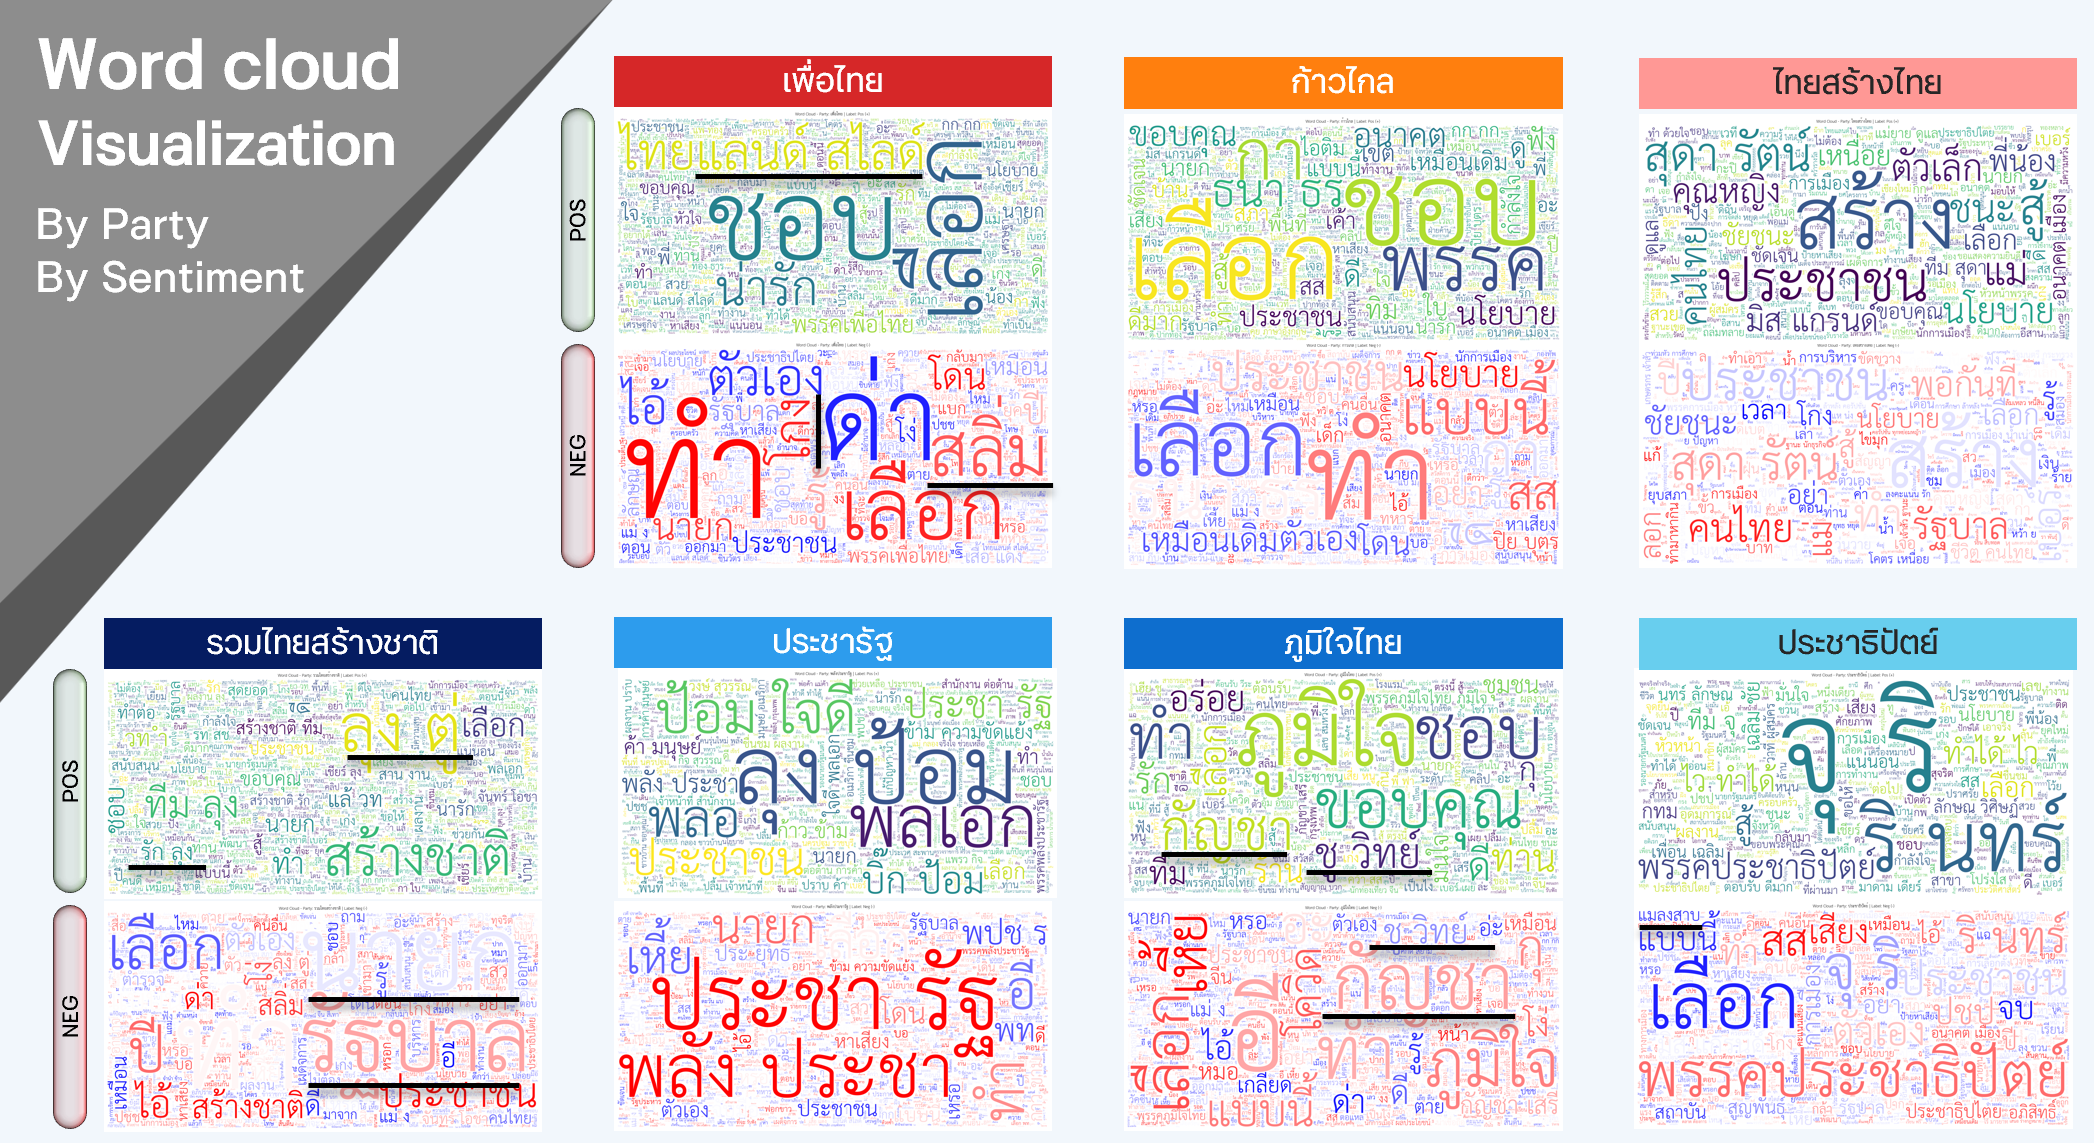

##Code From ChatGPT

In [ ]:
!pip install wordcloud
!pip install matplotlib
!pip install pythainlp

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from pythainlp.tokenize import word_tokenize

In [ ]:
# Tokenize the Thai text in the 'Text_cleaned' column
df['Text_tokenized'] = df['Text_cleaned'].apply(word_tokenize)

In [ ]:
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
# !pip install -U --pre matplotlib
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

font_path = 'THSarabunChula-Regular.ttf'  # Replace with the actual path to the font file

# Group by 'party' and 'label' and create word clouds
grouped = df.groupby(['party', 'label'])
for (party, label), group in grouped:
    text_tokens = group['Text_tokenized'].explode().tolist()
    text_combined = ' '.join(text_tokens)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm',
                          font_path=font_path).generate(text_combined)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud - Party: {party} | Label: {label}')
    plt.axis('off')
    plt.show()

##Code From Medium

https://karnyong.medium.com/%E0%B9%80%E0%B8%82%E0%B8%B5%E0%B8%A2%E0%B8%99-python-%E0%B8%AA%E0%B8%A3%E0%B9%89%E0%B8%B2%E0%B8%87%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%88%E0%B8%B3%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%A3%E0%B8%B9%E0%B9%89%E0%B8%AA%E0%B8%B6%E0%B8%81-sentiment-analysis-%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2-cdb43de08e9a

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
# thai_stopwords


custom_stop_words = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ',
'ไทยสร้างไทย','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','จุรินทร์','พิธา','สุดารัตน์','ประยุทธ์','พปชร','ลุงตู่','ธนาธร','ทักษิณ','เลือกตั้ง','พรรคก้าวไกล','ประเทศ','ประเทศไทย','ไทย','คน','เรื่อง','อันนี้','นะคะ','ครับ','ผม','กู','มึง','ดู','พรรค','ขนาด','เค้า','ไทย']
stop_words = set(thai_stopwords + custom_stop_words)

In [ ]:
Keywords = ['ก้าวไกล','เพื่อไทย','พลังประชารัฐ','ภูมิใจไทย','ประชาธิปัตย์','รวมไทยสร้างชาติ',
'ไทยสร้างไทย','แพทองธาร','อุ๊งอิ๊ง','ประวิตร','บิ๊กป้อม','อนุทิน',
'เสี่ยหนู','จุรินทร์','พิธา','สุดารัตน์','ประยุทธ์','พปชร','ลุงตู่','ธนาธร','ทักษิณ']

In [ ]:
from pythainlp import word_tokenize
def text_process(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split()
                     if word.lower not in thai_stopwords)
    return final
df['text_tokens'] = df['Text_cleaned'].apply(text_process)
df

In [ ]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[(df.label == 'pos') & (df.party == 'ไทยสร้างไทย')]
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunChula-Regular.ttf'
wordcloud = WordCloud(stopwords=stop_words, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.title(f'Word Cloud - Party: ไทยสร้างไทย | Label: Pos (+) ')
plt.axis('off')
plt.show()

In [ ]:
df_neg = df[(df.label == 'neg') & (df.party == 'ไทยสร้างไทย')]
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=stop_words, colormap="bwr",background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.title(f'Word Cloud - Party: ไทยสร้างไทย | Label: Neg (-)')
plt.axis('off')
plt.show()

#MLR: multiple linear regression

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/MLR.csv')
# del df["Unnamed: 0"]
df

In [ ]:
df.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the dataset
# data = pd.read_csv('sales_data.csv')  # Assuming the data is stored in a CSV file

# Prepare the data
X = df[['RT2','RT3','RT4']]  # Independent variables
y = df['Party']  # Dependent variable

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
# model.fit(X_train, y_train)
model.fit(X, y)

# Predict on the testing data
y_pred = model.predict(X)
print(y_pred,'\n')

print(f'-----{X.columns}-------')

# Evaluate the model
mse = mean_squared_error(y, y_pred)
print('Mean Squared Error:', mse)

# Print the coefficients and intercept
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
